In [ ]:
!pip install geopandas
!pip install git+https://github.com/Nathaniel-Rodriguez/linkcom.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/Nathaniel-Rodriguez/linkcom.git to /tmp/pip-req-build-zhzzl6zf
  Running command git clone --filter=blob:none --quiet https://github.com/Nathaniel-Rodriguez/linkcom.git /tmp/pip-req-build-zhzzl6zf
  Resolved https://github.com/Nathaniel-Rodriguez/linkcom.git to commit 741f0ab54cc28704031613fba979b8cd15039ef5
  Preparing metadata (setup.py) ... done


In [ ]:
import geopandas as gpd
import linkcom
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import networkx as nx
import pandas as pd

# for Notebook
%matplotlib inline

In [ ]:
#preprocess on excel
#read data
#set indexes and remove or replace values
#export

In [ ]:
#x-axis: reciepients
#y-axis: donors

df = pd.read_csv('/content/drive/MyDrive/Network Science/qwids_data/2021_1.csv', index_col=0)
df.head()

,Afghanistan,Albania,Algeria,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Azerbaijan,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis and Futuna,West Bank and Gaza Strip,Yemen,Zambia,Zimbabwe
Australia,50.54,0.01,0.00,0.00,0,0.06,0.06,0.00,0,0.00,...,0,0.02,89.78,0.00,88.00,0.06,18.26,7.51,2.66,2.92
Austria,3.82,13.92,0.45,0.01,0,0.00,0.54,5.19,0,0.49,...,0,2.14,0.15,1.60,2.69,0.00,7.81,8.27,0.17,0.16
Belgium,2.63,0.04,0.12,0.35,0,0.00,0.00,0.77,0,0.00,...,0,0.01,0.00,0.00,8.16,0.00,23.73,6.85,1.50,0.80
Canada,113.21,0.01,-0.39,2.33,0,0.16,4.42,0.90,0,1.35,...,0,0.13,0.20,13.39,11.97,0.00,37.42,64.59,8.00,13.82
Czech Republic,3.02,0.24,0.05,0.02,0,0.00,0.01,0.33,0,0.00,...,0,0.07,0.00,0.07,1.93,0.00,0.84,0.16,3.46,0.03


In [ ]:
df.describe()

,Afghanistan,Albania,Algeria,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Azerbaijan,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis and Futuna,West Bank and Gaza Strip,Yemen,Zambia,Zimbabwe
count,51.000000,51.000000,51.000000,51.000000,51.0,51.000000,51.000000,51.000000,51.0,51.000000,...,51.0,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,77.156471,13.535294,4.169216,3.926667,0.0,0.102941,1.806275,4.797059,0.0,2.992157,...,0.0,11.684706,2.714314,4.772549,13.302745,2.167059,32.458627,45.643333,13.768431,12.663725
std,227.696219,57.742976,15.347594,10.365723,0.0,0.406745,3.923888,15.765278,0.0,9.393385,...,0.0,49.677484,13.028690,15.619818,33.284380,15.332204,66.542637,142.131054,57.544853,49.646138
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.070000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.000000,0.000000,0.005000,0.000000,0.060000,0.055000,0.000000,0.000000
50%,3.020000,0.120000,0.030000,0.010000,0.0,0.000000,0.010000,0.030000,0.0,0.010000,...,0.0,0.020000,0.000000,0.020000,0.910000,0.000000,2.720000,1.260000,0.120000,0.060000
75%,47.510000,2.395000,1.400000,1.840000,0.0,0.000000,0.465000,0.700000,0.0,0.475000,...,0.0,1.550000,0.045000,1.365000,5.130000,0.000000,35.005000,18.650000,2.905000,2.345000
max,1480.720000,371.110000,100.030000,51.790000,0.0,2.200000,17.610000,88.360000,0.0,44.240000,...,0.0,348.370000,89.780000,104.840000,142.810000,109.510000,310.550000,900.570000,399.980000,343.130000


In [ ]:
df = df.mask(df < 0, 0)

In [ ]:
df.to_csv('2021_python.csv')

In [ ]:
df = pd.read_csv('edgedata_2021.csv')

# Load dataset
G = nx.from_pandas_edgelist(
    df,
    source="Source",
    target="Target",
    edge_attr='Weight',
    create_using=nx.DiGraph()
)

### Network characteristics

In [ ]:
#number of nodes and edges
print(G)

DiGraph with 186 nodes and 3477 edges


In [ ]:
#cycles
nx.recursive_simple_cycles(G)

[]

In [ ]:
#Centralities

#Degree
##In degree
##Out degree

#Pagerank

### Data to map

In [ ]:
l_com = nx.community.louvain_communities(G, seed = 99)

In [ ]:
len(l_com)

5

In [ ]:
for i in l_com: print(i)

{'Colombia', 'Nepal', 'Austria', 'Spain', 'Bolivia', 'Cambodia', 'Italy', 'Ecuador', 'Luxembourg', 'Peru', 'Switzerland', 'Honduras', 'Sri Lanka', 'Benin', 'Mozambique', 'Bangladesh', 'Denmark', 'Sierra Leone', 'South Africa', 'Zambia', 'Togo', 'Ireland', 'Eritrea', 'Central African Republic', 'Philippines', 'Democratic Republic of the Congo', 'Somalia', "Democratic People's Republic of Korea", 'Burkina Faso', 'Gambia', 'Myanmar', 'Burundi', 'Poland', 'Belgium', 'Thailand', 'Congo', 'Guatemala', 'Norway', 'Cameroon', 'Nicaragua', 'Finland', 'Sudan', "Lao People's Democratic Republic", 'Madagascar', "Cote d'Ivoire", 'Malawi', 'Guinea', 'Tanzania', 'States Ex-Yugoslavia unspecified', 'Libya'}
{'Kiribati', 'Comoros', 'Saint Lucia', 'Jamaica', 'Lesotho', 'Argentina', 'Saint Vincent and the Grenadines', 'Paraguay', 'Gabon', 'Fiji', 'El Salvador', 'Germany', 'Israel', 'Costa Rica', 'Sao Tome and Principe', 'Belize', 'Mauritius', 'Turkmenistan', 'Cuba', 'Guyana', 'Vanuatu', 'United Arab Emira

In [ ]:
alt_cnames = {"China (People's Republic of)": "China",
              "United States": "United States of America",
              "Lao People's Democratic Republic": "Laos",
              "Democratic People's Republic of Korea": "North Korea",
              "States Ex-Yugoslavia unspecified": "",
              "Central African Republic": "Central African Rep.",
              "Democratic Republic of the Congo": "Dem. Rep. Congo",
              "Monaco": "",
              "Syrian Arab Republic": "Syria",
              "West Bank and Gaza Strip": "",
              "Sao Tome and Principe": "",
              "Slovak Republic": "Slovakia",
              "Liechtenstein": "",
              "Czech Republic": "Czechia",
              "South Sudan": "S. Sudan",
              "Malta": "",
              "Bosnia and Herzegovina": "Bosnia and Herz.",
              "Viet Nam": "Vietnam",
              "Türkiye": "Turkey",
              "Mauritius": "",
              "Marshall Islands": "",
              "Korea": "South Korea",
              "Saint Lucia": "",
              "Tokelau": "",
              "Tonga": "",
              "Equatorial Guinea": "Eq. Guinea",
              "Samoa": "",
              "Grenada": "",
              "Dominica": "",
              "Antigua and Barbuda": "",
              "Wallis and Futuna": "",
              "Kiribati": "",
              "Saint Helena": "",
              "Tuvalu": "",
              "Niue": "",
              "Cabo Verde": "",
              "Eswatini": "eSwatini",
              "Cote d'Ivoire": "Côte d'Ivoire",
              "Comoros": "",
              "Palau": "",
              "Saint Vincent and the Grenadines": "",
              "Montserrat": "",
              "Chinese Taipei": "",
              "Dominican Republic": "Dominican Rep.",
              "Micronesia": "",
              "Nauru": "",
              "Solomon Islands": "Solomon Is.",
              "Maldives": ""
              }

In [ ]:
# Define the path to the shapefile for the world map
world_file = gpd.datasets.get_path('naturalearth_lowres')

# Read in the shapefile as a GeoDataFrame
world = gpd.read_file(world_file)

# Define a list of colors to use for each set of countries
color_list = ['red', 'blue', 'green', 'orange', 'purple']

# Iterate over each set in the list and set the corresponding countries' colors
for i, country_set in enumerate(l_com):
    country_color = color_list[i % len(color_list)]
    for country_name in country_set:
      if country_name not in list(world['name']):
        #print(country_name)
        country_name = alt_cnames[country_name]
      world.loc[world['name'] == country_name, 'color'] = country_color

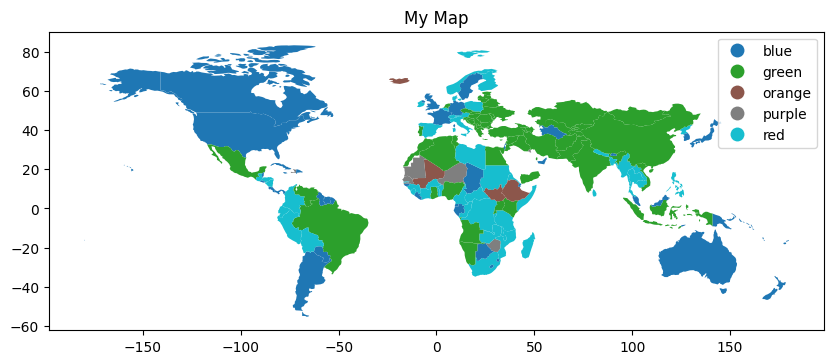

In [ ]:
# Plot the map with the colored countries
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(column='color', ax=ax, legend=True)
ax.set_title('My Map')
plt.show()

In [ ]:
#world.to_csv('world.csv')

### Community Detection - Louvain

In [ ]:
def map_communites(cgraph):
  l_com = nx.community.louvain_communities(cgraph, seed = 99)

  #Replacing country names in the QWIDS data to match the names in geodata package
  alt_cnames = {"China (People's Republic of)": "China",
              "United States": "United States of America",
              "Lao People's Democratic Republic": "Laos",
              "Democratic People's Republic of Korea": "North Korea",
              "States Ex-Yugoslavia unspecified": "",
              "Central African Republic": "Central African Rep.",
              "Democratic Republic of the Congo": "Dem. Rep. Congo",
              "Monaco": "",
              "Syrian Arab Republic": "Syria",
              "West Bank and Gaza Strip": "",
              "Sao Tome and Principe": "",
              "Slovak Republic": "Slovakia",
              "Liechtenstein": "",
              "Czech Republic": "Czechia",
              "South Sudan": "S. Sudan",
              "Malta": "",
              "Bosnia and Herzegovina": "Bosnia and Herz.",
              "Viet Nam": "Vietnam",
              "Türkiye": "Turkey",
              "Mauritius": "",
              "Marshall Islands": "",
              "Korea": "South Korea",
              "Saint Lucia": "",
              "Tokelau": "",
              "Tonga": "",
              "Equatorial Guinea": "Eq. Guinea",
              "Samoa": "",
              "Grenada": "",
              "Dominica": "",
              "Antigua and Barbuda": "",
              "Wallis and Futuna": "",
              "Kiribati": "",
              "Saint Helena": "",
              "Tuvalu": "",
              "Niue": "",
              "Cabo Verde": "",
              "Eswatini": "eSwatini",
              "Cote d'Ivoire": "Côte d'Ivoire",
              "Comoros": "",
              "Palau": "",
              "Saint Vincent and the Grenadines": "",
              "Montserrat": "",
              "Chinese Taipei": "",
              "Dominican Republic": "Dominican Rep.",
              "Micronesia": "",
              "Nauru": "",
              "Solomon Islands": "Solomon Is.",
              "Maldives": "",
              "Seychelles": "",
              "Cook Islands": "" 
              }


  world_file = gpd.datasets.get_path('naturalearth_lowres')
  world = gpd.read_file(world_file)

  color_list = ['Community 1', 'Community 2', 'Community 3', 'Community 4', 'Community 5', 'Community 6']

  '''
  #community where US is a part of
  us_com = []
  for com in l_com:
    #print(type(com))
    if "United States" in com:
      us_com.append(com)
      break
  print(len(us_com[0]))
  '''

  for i, country_set in enumerate(l_com):
  #for i, country_set in enumerate(us_com):
    country_color = color_list[i % len(color_list)]
    for country_name in country_set:
      if country_name not in list(world['name']):
        #print(country_name)
        country_name = alt_cnames[country_name]
      world.loc[world['name'] == country_name, 'color'] = country_color

  fig, ax = plt.subplots(figsize=(10, 6))
  world.plot(column='color', ax=ax, legend=True)
  ax.set_title('My Map')
  plt.show()

In [ ]:
a = [{'b', 'c'}, {'a', 'd'}]
a = sorted(a)
a

[{'b', 'c'}, {'a', 'd'}]

In [ ]:
#Download the data from QWIDS with appropriate settings
##Filters: All Sectors, Total, ODA, Disbursements, Current Prices (USD millions), Time Period, 2017

In [ ]:
#Using excel to do some preprocessing on data
##Removing rows and columns
##Replacing '..' with 0s

In [ ]:
#Replacing negative values with 0
years = [2017, 2018, 2019, 2020, 2021]

for year in years:
  df = pd.read_csv(f'{year}.csv', index_col=0)
  df = df.mask(df < 0, 0)
  df.to_csv(f'df_python_{year}.csv')

Year 2017


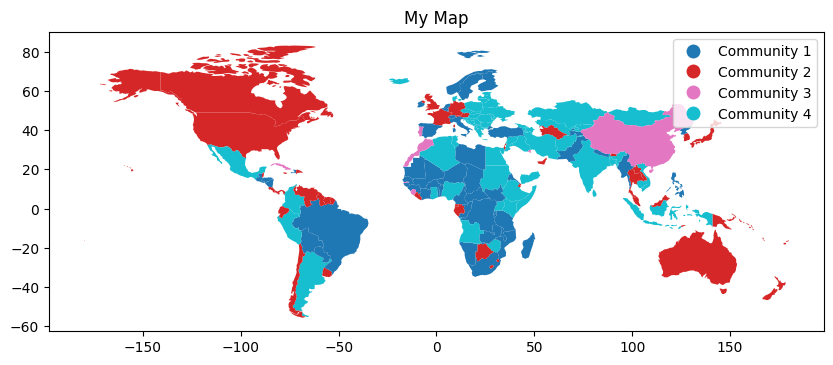

Year 2018


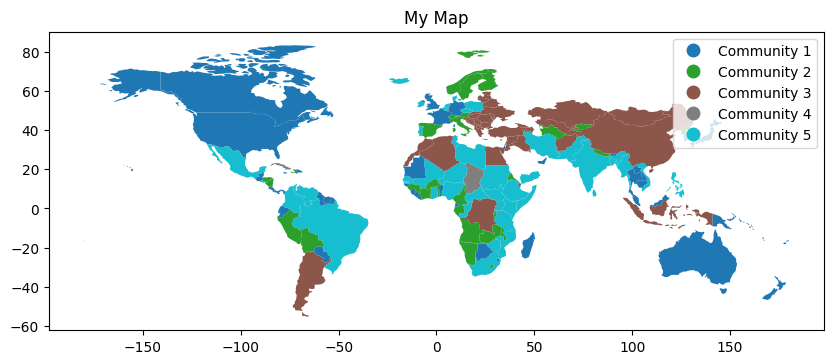

Year 2019


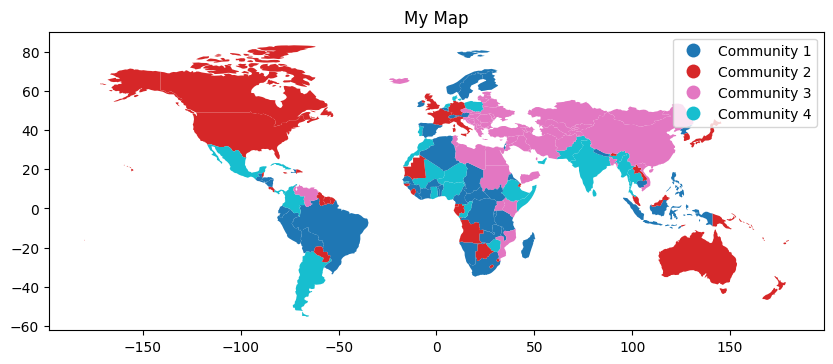

Year 2020


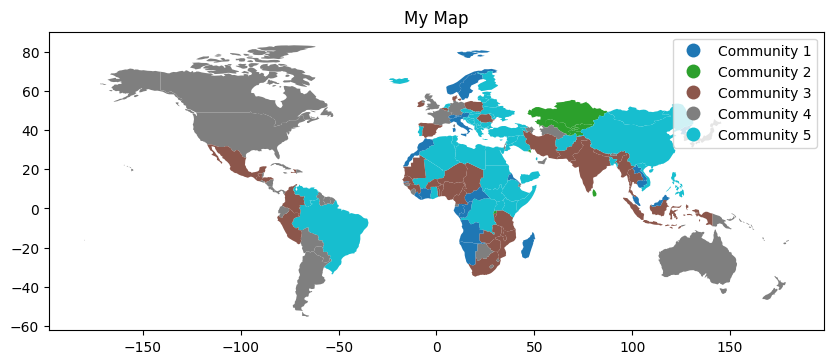

Year 2021


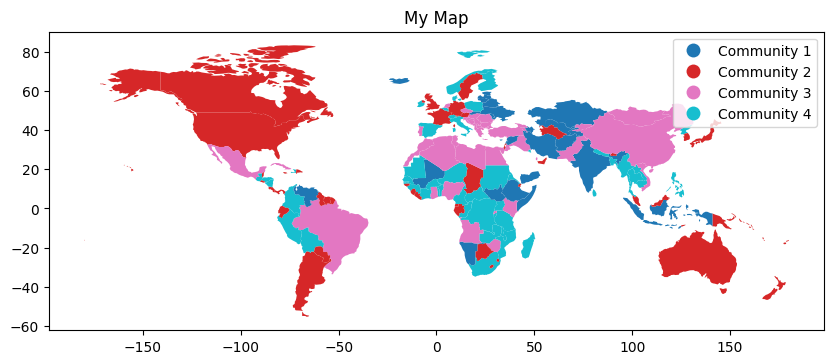

In [ ]:
#Creating directional graphs
for year in years:

  df = pd.read_csv(f'edgedata_{year}.csv')

  # Load dataset
  G = nx.from_pandas_edgelist(
      df,
      source="Source",
      target="Target",
      edge_attr='Weight',
      create_using=nx.DiGraph()
  )
  print('Year', year)
  map_communites(G)

Year 2017
65


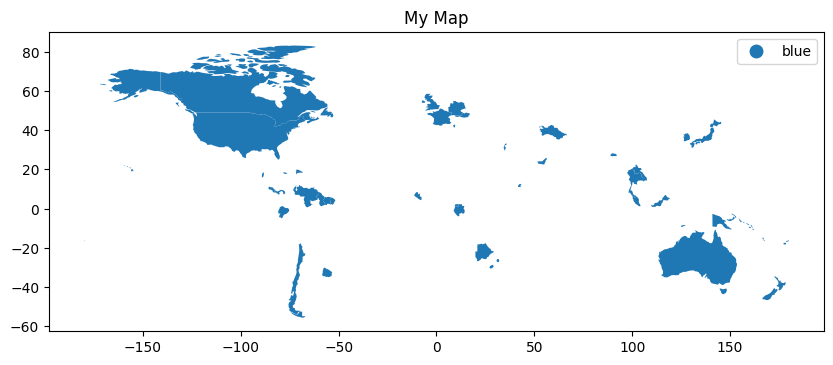

Year 2018
64


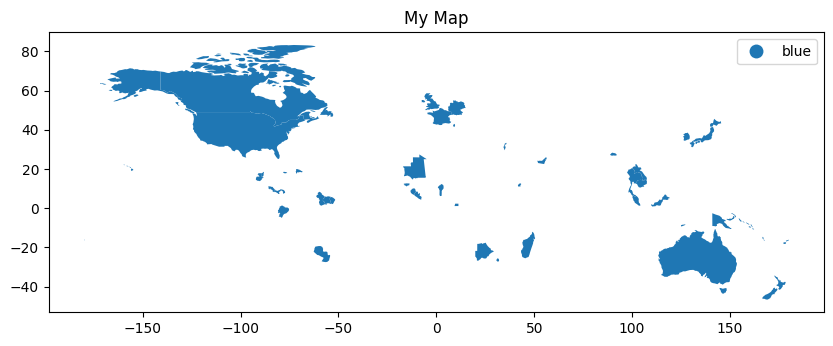

Year 2019
60


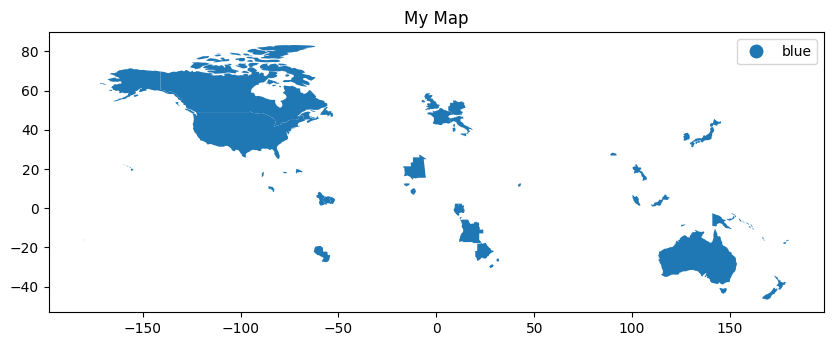

Year 2020
64


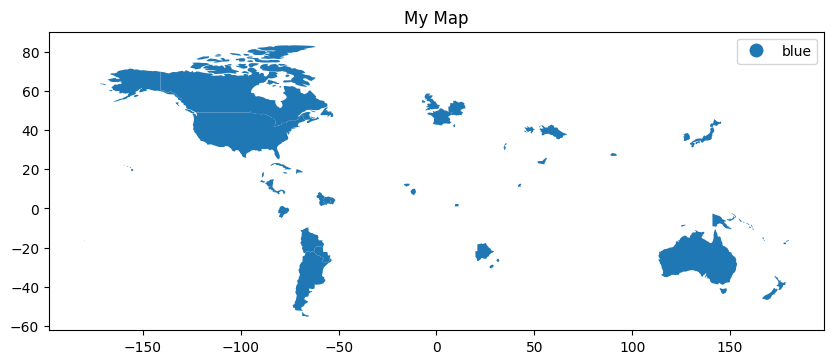

Year 2021
66


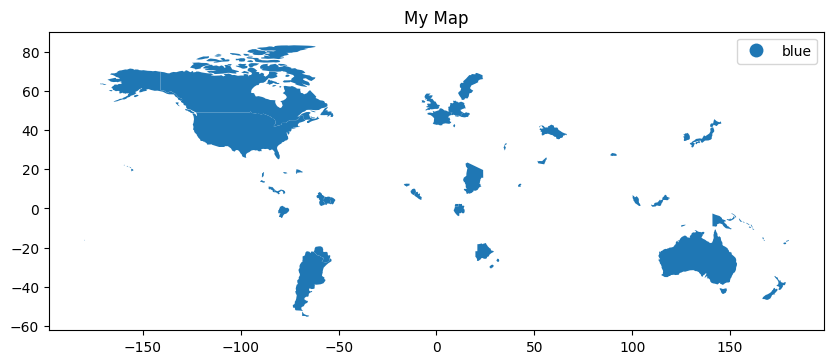

In [ ]:
#Communities over the years that contain US

for year in years:
  df = pd.read_csv(f'edgedata_{year}.csv')
  G = nx.from_pandas_edgelist(
      df,
      source="Source",
      target="Target",
      edge_attr='Weight',
      create_using=nx.DiGraph()
  )
  print('Year', year)
  map_communites(G)

### Community Detection - Link

In [ ]:
#Creating directional graphs
for year in years:

  df = pd.read_csv(f'edgedata_{year}.csv')

  # Load dataset
  G = nx.from_pandas_edgelist(
      df,
      source="Source",
      target="Target",
      edge_attr='Weight',
      create_using=nx.DiGraph()
  )

In [ ]:
df = pd.read_csv(f'edgedata_2021.csv')

# Load dataset
G = nx.from_pandas_edgelist(
      df,
      source="Source",
      target="Target",
      edge_attr='Weight',
      create_using=nx.DiGraph()
)

G = nx.Graph(G)
#print(type(G).__name__)

e2c, S, D, Dlist = linkcom.cluster(G, is_weighted=True, weight_key = 'Weight')

clustering...
computing similarities...
# D_max = 0.195477
# S_max = 0.003008


In [ ]:
nx.set_edge_attributes(G, e2c, "linkcom")

# Save the graph to file
nx.write_gexf(G, "link_com.gexf")

In [ ]:
#Couldnt identify any outright insights
##Could have gone wrong in terms any settings